In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import math

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [138]:
import yfinance as yahooFinance
 
GetFacebookInformation = yahooFinance.Ticker("ADRO.JK")
 
# Valid options are 1d, 5d, 1mo, 3mo, 6mo, 1y,
# 2y, 5y, 10y and ytd.
df = GetFacebookInformation.history(period="10y")
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-12-14 00:00:00+07:00,2460.0,2510.0,2440.0,2490.0,23293600,0.0,0.0
2023-12-15 00:00:00+07:00,2490.0,2570.0,2490.0,2520.0,52881100,0.0,0.0
2023-12-18 00:00:00+07:00,2530.0,2550.0,2470.0,2510.0,25316200,0.0,0.0
2023-12-19 00:00:00+07:00,2580.0,2620.0,2570.0,2600.0,67987900,0.0,0.0
2023-12-20 00:00:00+07:00,2600.0,2640.0,2580.0,2580.0,51466300,0.0,0.0


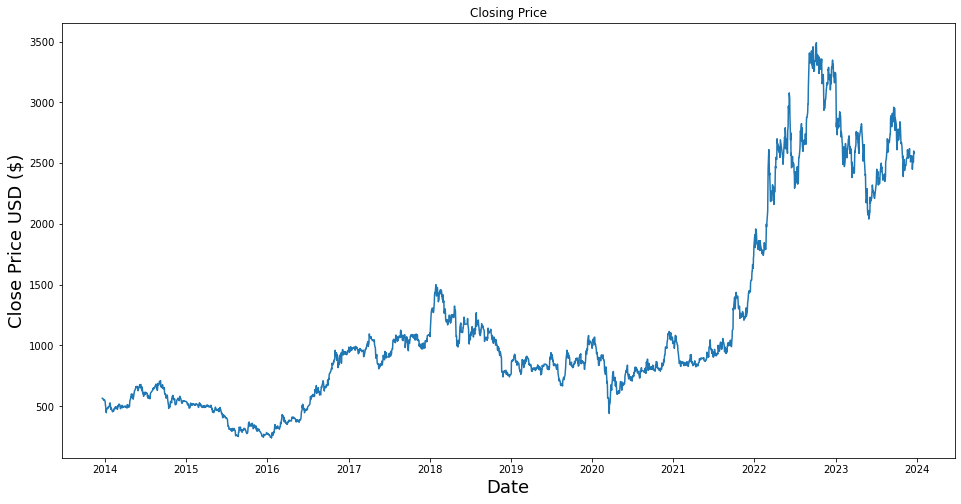

In [139]:
plt.figure(figsize=(16,8))
plt.title('Closing Price')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [140]:
new_df = df.filter(['Close'])
new_df

,Close
Date,
2013-12-20 00:00:00+07:00,565.844788
2013-12-23 00:00:00+07:00,560.837341
2013-12-24 00:00:00+07:00,560.837341
2013-12-27 00:00:00+07:00,548.297546
2013-12-30 00:00:00+07:00,553.374451
...,...
2023-12-14 00:00:00+07:00,2490.000000
2023-12-15 00:00:00+07:00,2520.000000
2023-12-18 00:00:00+07:00,2510.000000


In [141]:
data=df.filter(['Close'])

#Convert to np array
dataset=data.values

#Get the number of rows to train the model on
#math.ceil to round up 

training_data_len = math.ceil(len(dataset)*.8)


#print(dataset)
training_data_len

1985

In [142]:
#Scale the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.10060587],
       [0.09906625],
       [0.09906625],
       ...,
       [0.69836801],
       [0.72603998],
       [0.71989065]])

In [143]:
#Create training dataset
#Create scaled training dataset

train_data = scaled_data[0:training_data_len,:]

#Split the data into x_train and y_train data set

x_train=[]
y_train=[]

for i in range(150, len(train_data)):
    x_train.append(train_data[i-150:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

In [144]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [145]:
#Reshape the data into 3 dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1835, 150, 1)

In [146]:
#Build LSTM model
model=Sequential()
#Add first layer to model
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
#Add second layer to model
model.add(LSTM(50, return_sequences=False))
#Add Dense Layer to model with 25 neurons
model.add(Dense(25))
#Add Dense Layer to model with 1 neuron
model.add(Dense(1))

In [147]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [148]:
#Train the model
model.fit(x_train, y_train, batch_size=1,epochs=3 )

Epoch 1/3
1835/1835 [==============================] - 212s 112ms/step - loss: 4.6970e-04
Epoch 2/3
1835/1835 [==============================] - 206s 112ms/step - loss: 1.8820e-04
Epoch 3/3
1835/1835 [==============================] - 205s 112ms/step - loss: 1.5073e-04


In [152]:
#Create the test data set
#Create a new array containing scaled values

test_data=scaled_data[training_data_len-150: , : ]
#Create the data sets x_test and y_test

x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(150, len(test_data)):
    x_test.append(test_data[i-150:i,0])

In [153]:
#Convert the data to a numpy array
x_test=np.array(x_test)

#Reshape the data to 3d
x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [154]:
#Get the models predicted price values
y_pred=model.predict(x_test)
y_pred=scaler.inverse_transform(y_pred)

16/16 [==============================] - 3s 68ms/step


In [155]:
rmse = mean_squared_error(y_test, y_pred, squared = False)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("RMSE: ", rmse)
print("MAPE: ", mape)

RMSE:  88.54412658739093
MAPE:  0.026719276246975166


<ipython-input-156-e7e87788e0a0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['y_pred'] = y_pred


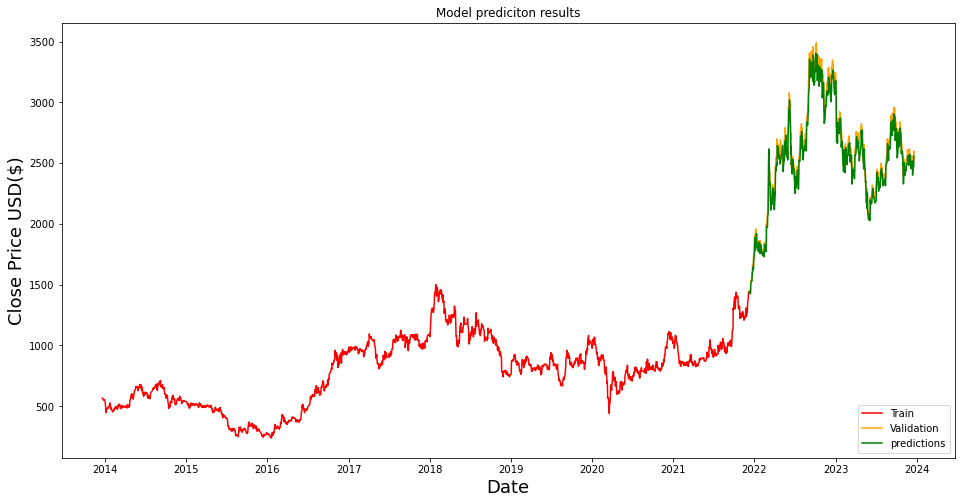

In [156]:
#plot the data

train=data[:training_data_len]
valid=data[training_data_len:]
valid['y_pred'] = y_pred

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model prediciton results')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['Close'] , color='red')
plt.plot(valid['Close'] , color='orange')
plt.plot(valid[ 'y_pred'] , color='green')
plt.legend(['Train','Validation', 'predictions'], loc='lower right')
#plt.savefig('/content/prediction.png')
plt.show()

In [157]:
valid.tail()

,Close,y_pred
Date,,
2023-12-14 00:00:00+07:00,2490.0,2401.370117
2023-12-15 00:00:00+07:00,2520.0,2429.459229
2023-12-18 00:00:00+07:00,2510.0,2473.289062
2023-12-19 00:00:00+07:00,2600.0,2471.102539
2023-12-20 00:00:00+07:00,2580.0,2558.822021


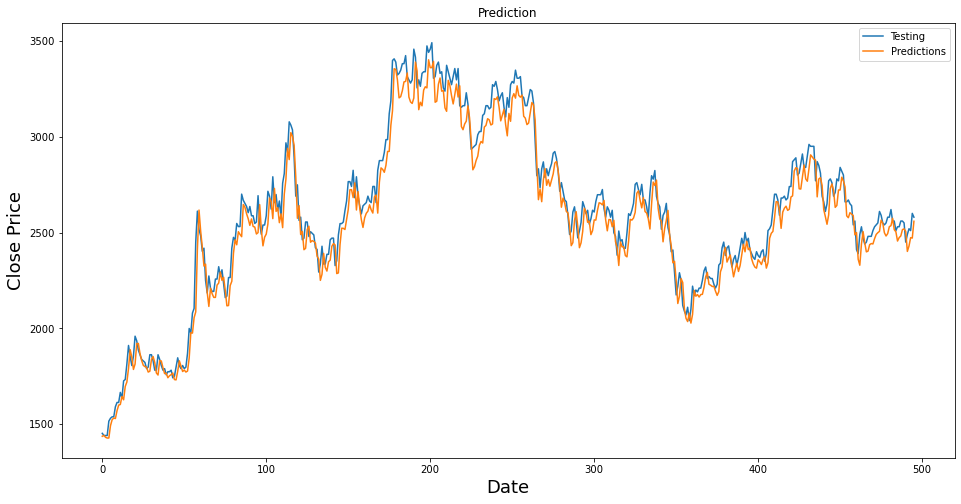

In [158]:
plt.figure(figsize=(16,8))
plt.title('Prediction')
plt.plot(y_test, label = "line 1")
plt.plot(y_pred, label = "line 2") 
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.legend(['Testing', 'Predictions'])
plt.show()

# Next Day Stock Price

In [294]:
new_df=df.filter(['Close'])
#Get last 60 days values and convert into array
last_150_days=new_df[-150:].values

#Scale the data to be values between 0
last_150_days_scaled=scaler.transform(last_150_days)

#Create an empty list
X_test=[]
#Appemd the past 150days
X_test.append(last_150_days_scaled)

#Conver the X_test data into numpy array
X_test_array = np.array(X_test)

#Reshape the data
X_test_reshape = np.reshape(X_test_array, (X_test_array.shape[0], X_test_array.shape[1],1))
#Get predicted scaled price
pred_price = model.predict(X_test_reshape)
#undo the scaling
pred_price_inverse=scaler.inverse_transform(pred_price)
print(f'Price of ASII tomorrow:{pred_price_inverse}')

1/1 [==============================] - 0s 84ms/step
Price of ASII tomorrow:[[2546.671]]


In [295]:
pred_price

array([[0.70964307]], dtype=float32)

In [296]:
X_test

[array([[0.69217462],
        [0.66443743],
        [0.66721108],
        [0.63115278],
        [0.5950944 ],
        [0.60896296],
        [0.63072543],
        [0.61842678],
        [0.57845617],
        [0.56923218],
        [0.56308286],
        [0.57538151],
        [0.55385887],
        [0.57230684],
        [0.6092028 ],
        [0.59382948],
        [0.60305347],
        [0.59997881],
        [0.60612813],
        [0.60612813],
        [0.61842678],
        [0.6338001 ],
        [0.63994942],
        [0.62150145],
        [0.62457611],
        [0.62150145],
        [0.62150145],
        [0.61227746],
        [0.60612813],
        [0.61227746],
        [0.64302408],
        [0.64609875],
        [0.67069605],
        [0.67992004],
        [0.6583974 ],
        [0.67069605],
        [0.67377071],
        [0.65532274],
        [0.63994942],
        [0.65224807],
        [0.6583974 ],
        [0.64302408],
        [0.65532274],
        [0.67069605],
        [0.68606936],
        [0

# Next 7 Days Stock Price

In [297]:
for i in range(1,8):
    pred_price = model.predict(X_test_reshape)
    pred_price_inverse = scaler.inverse_transform(pred_price)
    new_df.loc[i] = list(pred_price_inverse)
    last_150_days=new_df[-150:].values
    #Scale the data to be values between 0
    last_150_days_scaled=scaler.transform(last_150_days)
    #Create an empty list
    X_test=[]
    #Appemd the past 60days
    X_test.append(last_150_days_scaled)
    #Conver the X_test data into numpy array
    X_test_array = np.array(X_test)
    #Reshape the data
    X_test_reshape = np.reshape(X_test_array, (X_test_array.shape[0], X_test_array.shape[1],1))

1/1 [==============================] - 0s 83ms/step


In [298]:
new_df.tail(20)

,Close
Date,
2023-12-04 00:00:00+07:00,2560.0
2023-12-05 00:00:00+07:00,2510.0
2023-12-06 00:00:00+07:00,2530.0
2023-12-07 00:00:00+07:00,2530.0
2023-12-08 00:00:00+07:00,2560.0
2023-12-11 00:00:00+07:00,2560.0
2023-12-12 00:00:00+07:00,2550.0
2023-12-13 00:00:00+07:00,2450.0
2023-12-14 00:00:00+07:00,2490.0
